In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows
print(data.head())


                                               Title Rating Reviews   Price  \
0  Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...    3.8     684  33,999   
1  Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...    3.8      60   9,999   
2  realme NARZO N61 (Marble Black,6GB RAM+128GB S...    4.1     346  10,999   
3  realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...    4.1     346  10,999   
4            POCO C61 Ethereal Blue 4GB RAM 64GB ROM    3.5      27   8,999   

                                           Image URL  \
0  https://m.media-amazon.com/images/I/71nrf4zgq5...   
1  https://m.media-amazon.com/images/I/81T3olLXpU...   
2  https://m.media-amazon.com/images/I/71EN6N9kUE...   
3  https://m.media-amazon.com/images/I/71r0Ysx+oV...   
4  https://m.media-amazon.com/images/I/712tqhtIw1...   

                                         Product URL  
0  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
1  https://www.amazon.in/Samsung-Storage-Display-...  
2  https://www.amazon.i

In [5]:
import re

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

# Apply preprocessing to the Title column
data['Processed_Title'] = data['Title'].apply(preprocess_text)
data.head()

,Title,Rating,Reviews,Price,Image URL,Product URL,Processed_Title
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...",3.8,684,"33,999",https://m.media-amazon.com/images/I/71nrf4zgq5...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,redmi note 13 pro fusion black 8gb ram 256gb s...
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",3.8,60,"9,999",https://m.media-amazon.com/images/I/81T3olLXpU...,https://www.amazon.in/Samsung-Storage-Display-...,samsung galaxy m05 mint green 4gb ram 64 gb st...
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71EN6N9kUE...,https://www.amazon.in/realme-Storage-Comfort-R...,realme narzo n61 marble black6gb ram128gb stor...
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71r0Ysx+oV...,https://www.amazon.in/realme-Storage-Comfort-R...,realme narzo n61 voyage blue6gb ram128gb stora...
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,3.5,27,"8,999",https://m.media-amazon.com/images/I/712tqhtIw1...,https://www.amazon.in/POCO-C61-Ethereal-Blue-6...,poco c61 ethereal blue 4gb ram 64gb rom


### Price Prediction using Random Forest Classifier

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features

# Fit and transform the titles
X_tfidf = tfidf_vectorizer.fit_transform(data['Processed_Title']).toarray()

In [11]:
def convert_price(price):
    # Remove any commas
    price_cleaned = price.replace(',', '')
    # Convert to float
    return float(price_cleaned)

# Convert the Price column to numeric
data['Price'] = data['Price'].apply(convert_price)

# Check the conversion
print(data['Price'].head())

y = data['Price'].values 

0    33999.0
1     9999.0
2    10999.0
3    10999.0
4     8999.0
Name: Price, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 3, 4, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error (Tuned Model): {mse_best}')


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=150, random_state=42, max_depth=50, min_samples_split=2)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 19141255.649093784


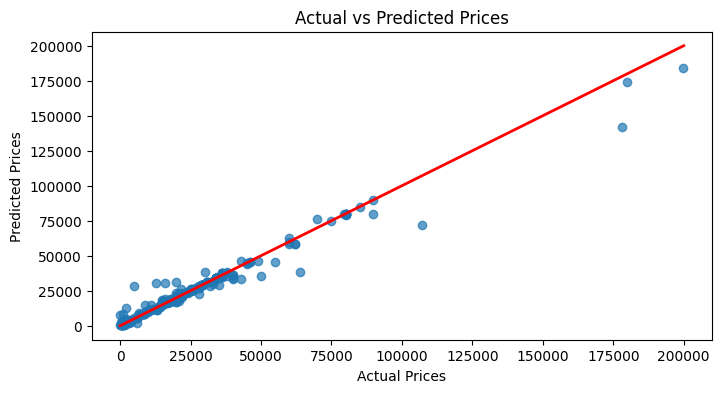

In [26]:
### import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Line for perfect predictions
plt.show()